In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ["NFLX","TSLA","GC=F"]
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2020-5-5', end="2021-5-4")['Adj Close']

In [3]:
a = 1

In [4]:
pf_data.head()

,NFLX,TSLA,GC=F
Date,,,
2020-05-05,424.679993,153.641998,1704.400024
2020-05-06,434.260010,156.516006,1684.199951
2020-05-07,436.529999,156.007996,1721.800049
2020-05-08,435.549988,163.884003,1709.900024
2020-05-11,440.519989,162.257996,1695.300049


In [5]:
pf_data.tail()

,NFLX,TSLA,GC=F
Date,,,
2021-04-28,506.519989,694.400024,1773.199951
2021-04-29,509.000000,677.000000,1768.099976
2021-04-30,513.469971,709.440002,1767.300049
2021-05-03,509.109985,684.900024,1791.400024
2021-05-04,503.179993,673.599976,1775.800049


<AxesSubplot:xlabel='Date'>

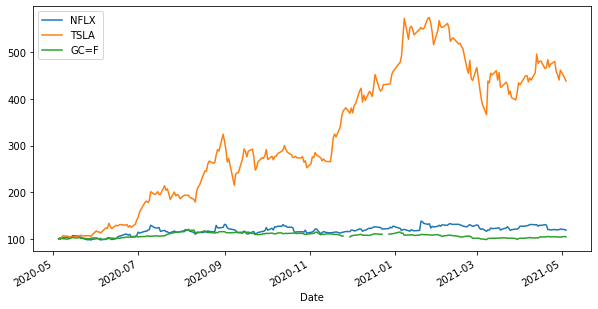

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [7]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [8]:
log_returns.cov() 

,NFLX,TSLA,GC=F
NFLX,0.000694,0.000427,0.000061
TSLA,0.000427,0.002074,0.000064
GC=F,0.000061,0.000064,0.000125


In [9]:
st_deviation = pd.DataFrame(np.sqrt(log_returns.var()))
st_deviation

,0
NFLX,0.026338
TSLA,0.045540
GC=F,0.011190


In [10]:
mean_return = log_returns.mean()
mean_return

NFLX    0.000676
TSLA    0.005888
GC=F    0.000229
dtype: float64

In [11]:
log_returns.corr()

,NFLX,TSLA,GC=F
NFLX,1.000000,0.355935,0.204014
TSLA,0.355935,1.000000,0.124924
GC=F,0.204014,0.124924,1.000000


In [12]:
num_assets = len(assets)

In [13]:
num_assets

3

****

## Constructing Efficient Portfolio Frontier:

In [14]:
pfolio_returns = []
pfolio_volatilities = []
pfolio_weights = []

for x in range (5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * a)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * a, weights))))
    weights = np.round(weights,3)
    pfolio_weights.append(weights)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.00309878, 0.00245541, 0.00267639, ..., 0.0011211 , 0.00194883,
        0.00364926]),
 array([0.02624763, 0.02003635, 0.02184716, ..., 0.0165802 , 0.01951065,
        0.02978647]))

In [15]:
#Sharpe ratio
sharpe_ratio = pfolio_returns/pfolio_volatilities

In [16]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities,"Sharpe Ratio" : sharpe_ratio})

In [17]:
portfolios.head()

,Return,Volatility,Sharpe Ratio
0,0.003099,0.026248,0.118059
1,0.002455,0.020036,0.122548
2,0.002676,0.021847,0.122505
3,0.000650,0.016476,0.039466
4,0.002748,0.026560,0.103454


In [18]:
portfolios.tail()

,Return,Volatility,Sharpe Ratio
4995,0.000615,0.021539,0.028576
4996,0.003054,0.027138,0.112524
4997,0.001121,0.016580,0.067617
4998,0.001949,0.019511,0.099885
4999,0.003649,0.029786,0.122514


In [19]:
porfolio_metrics = [pfolio_returns,pfolio_volatilities,sharpe_ratio, pfolio_weights] 
portfolio_metr_df = pd.DataFrame(porfolio_metrics)
portfolio_metr_df = portfolio_metr_df.T
portfolio_metr_df.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

In [20]:
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_metr_df[col] = portfolio_metr_df[col].astype(float)

In [21]:
portfolio_metr_df.head()

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
0,0.003099,0.026248,0.118059,"[0.283, 0.485, 0.233]"
1,0.002455,0.020036,0.122548,"[0.034, 0.391, 0.575]"
2,0.002676,0.021847,0.122505,"[0.101, 0.424, 0.474]"
3,0.000650,0.016476,0.039466,"[0.54, 0.032, 0.429]"
4,0.002748,0.026560,0.103454,"[0.508, 0.405, 0.087]"


In [22]:
portfolio_metr_df.tail()

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
4995,0.000615,0.021539,0.028576,"[0.792, 0.006, 0.202]"
4996,0.003054,0.027138,0.112524,"[0.394, 0.468, 0.138]"
4997,0.001121,0.016580,0.067617,"[0.457, 0.122, 0.422]"
4998,0.001949,0.019511,0.099885,"[0.366, 0.275, 0.359]"
4999,0.003649,0.029786,0.122514,"[0.229, 0.586, 0.185]"


In [23]:
max_sharpe = sharpe_ratio.max()
max_sharpe

0.1293142985914301

In [24]:
max_sharpe_index = sharpe_ratio.argmax()
max_sharpe_return = pfolio_returns[max_sharpe_index]
max_sharpe_vol = pfolio_volatilities[max_sharpe_index]
print("return = ", max_sharpe_return,";","volatility = ", max_sharpe_vol)

return =  0.005199165333378651 ; volatility =  0.04020564925929397


In [25]:
min_var_index = pfolio_volatilities.argmin()
min_var_return = pfolio_returns[min_var_index]
min_var = pfolio_volatilities[min_var_index]
print("minimum variance point = ",min_var,";","return in minimum variance = ", min_var_return)

minimum variance point =  0.0109132183035024 ; return in minimum variance =  0.00037833137837230097


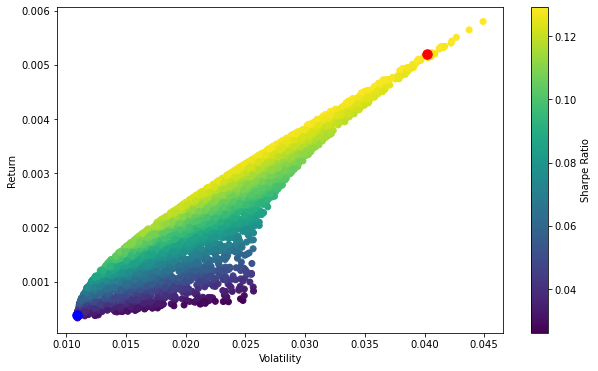

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(pfolio_volatilities, pfolio_returns,c = sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sharpe_vol,max_sharpe_return,c='red',s=90)
plt.scatter(min_var,min_var_return,c='blue',s=90)

# Result:

In [27]:
print("In the Global Minimum Variance Point, the Volatility(Risk) of the stock is ", round(min_var,5))
print(", with the Return of ", round(min_var_return,5))
print("The Allocation of the Asset in GMVP is ", pfolio_weights[min_var_index])
print("-"*120)

In the Global Minimum Variance Point, the Volatility(Risk) of the stock is  0.01091
, with the Return of  0.00038
The Allocation of the Asset in GMVP is  [0.081 0.02  0.899]
------------------------------------------------------------------------------------------------------------------------


In [28]:
print("In the Optimal Point, the Volatility(Risk) of the stock is ", round(max_sharpe_vol,5))
print(", with the Return of ", round(max_sharpe_return,5))
print("The Allocation of the Asset in Optimal Point is ", pfolio_weights[max_sharpe_index])
print("-"*120)

In the Optimal Point, the Volatility(Risk) of the stock is  0.04021
, with the Return of  0.0052
The Allocation of the Asset in Optimal Point is  [0.004 0.878 0.118]
------------------------------------------------------------------------------------------------------------------------
